In [1]:
"""
-----------------------------------------------------------------------------
Statelite image (band) read demo
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import pandas as pd
from numpy.linalg import inv,det

# Image read and write/save image using [scikit-image](https://scikit-image.org/)

For installation please go through: https://scikit-image.org/docs/stable/user_guide/install.html

# <font color='red'>Warning: Please do not use the command sudo and pip together as pip may overwrite critical system libraries which may require you to reinstall your operating system.</font>


band1 image size: (512, 512)


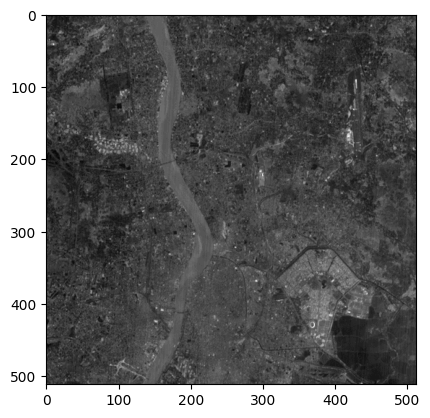

array([[94.5 , 94.5 , 92.25, ..., 94.5 , 94.5 , 94.5 ],
       [94.5 , 95.25, 94.5 , ..., 96.75, 94.5 , 94.5 ],
       [94.5 , 96.  , 93.  , ..., 95.25, 93.75, 93.75],
       ...,
       [93.  , 92.25, 92.25, ..., 92.25, 93.  , 91.5 ],
       [93.75, 93.  , 93.75, ..., 92.25, 93.  , 91.5 ],
       [94.5 , 95.25, 95.25, ..., 92.25, 92.25, 91.5 ]])

In [2]:
# IMAGE FILE NAME YOU WANT TO READ
img_filename = 'data/band1.gif'

img = plt.imread(img_filename).astype('double').mean(axis=2)

print('band1 image size: {}' .format(img.shape))

# DISPLAY
plt.imshow(img, cmap='gray')
plt.show()
img

In [3]:
river_coordinates_df = pd.read_csv('./data/annotated_points_band4_np_50.csv')  
non_river_coordinates_df=pd.read_csv('./data/annotated_points_band4_np_150.csv')


In [4]:
river_coord=river_coordinates_df.values
non_river_coord=non_river_coordinates_df.values
print('river_coord shape: {}'  .format(river_coord.shape))
print('non_river_coord shape: {}'  .format(non_river_coord.shape))

river_coord shape: (50, 2)
non_river_coord shape: (150, 2)


Text(0.5, 1.0, 'Band 4')

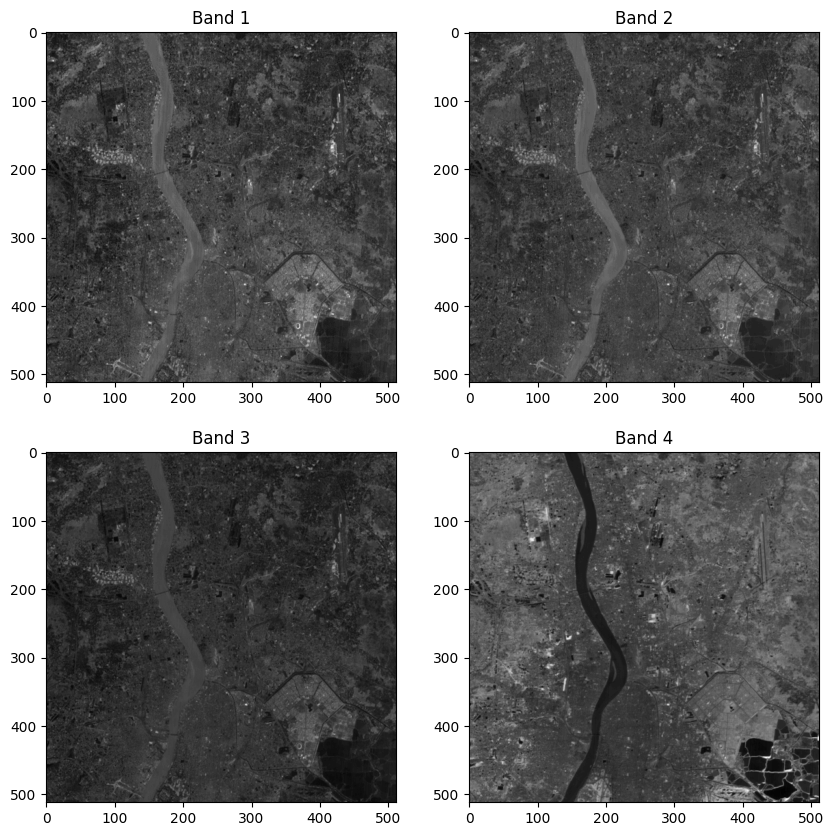

In [5]:
img_filename1 = 'data/band1.gif'
img_filename2 = 'data/band2.gif'
img_filename3 = 'data/band3.gif'
img_filename4 = 'data/band4.gif'

band1 = plt.imread(img_filename1).astype('double').mean(axis=2)
band2 = plt.imread(img_filename2).astype('double').mean(axis=2)
band3 = plt.imread(img_filename3).astype('double').mean(axis=2)
band4 = plt.imread(img_filename4).astype('double').mean(axis=2)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(band1, cmap='gray')
axs[0, 0].set_title('Band 1')

axs[0, 1].imshow(band2, cmap='gray')
axs[0, 1].set_title('Band 2')

axs[1, 0].imshow(band3, cmap='gray')
axs[1, 0].set_title('Band 3')

axs[1, 1].imshow(band4, cmap='gray')
axs[1, 1].set_title('Band 4')

### River Dataset

In [6]:
band1_intensity=band1[river_coord[:,0],river_coord[:,1]]
band2_intensity=band2[river_coord[:,0],river_coord[:,1]]
band3_intensity=band3[river_coord[:,0],river_coord[:,1]]
band4_intensity=band4[river_coord[:,0],river_coord[:,1]]
print(band1_intensity.shape)
print(band2_intensity.shape)
print(band3_intensity.shape)
print(band4_intensity.shape)


(50,)
(50,)
(50,)
(50,)


In [7]:
river_data = {
    'b1': band1_intensity,
    'b2': band2_intensity,
    'b3': band3_intensity,
    'b4': band4_intensity,
    'label':0
}
df1 = pd.DataFrame(river_data)

In [ ]:
df1

In [9]:
df1.to_csv('river_data.csv', index=False)


### Calculating Mean for river

In [10]:
b1_mean1=df1['b1'].mean()
b2_mean1=df1['b2'].mean()
b3_mean1=df1['b3'].mean()
b4_mean1=df1['b4'].mean()

### Calculating Covariance for river

In [11]:
selected_columns = ['b1', 'b2', 'b3', 'b4']
selected_data = df1[selected_columns]

df1_array = selected_data.to_numpy()
r_cov_matrix = np.cov(df1_array, rowvar=False)

### Non-River Dataset

In [12]:
band1_non_river_intensity=band1[non_river_coord[:,0],non_river_coord[:,1]]
band2_non_river_intensity=band2[non_river_coord[:,0],non_river_coord[:,1]]
band3_non_river_intensity=band3[non_river_coord[:,0],non_river_coord[:,1]]
band4_non_river_intensity=band4[non_river_coord[:,0],non_river_coord[:,1]]

In [ ]:
print(band1_non_river_intensity.shape)
print(band2_non_river_intensity.shape)
print(band3_non_river_intensity.shape)
print(band4_non_river_intensity.shape)
print(band4_non_river_intensity)


In [14]:
Non_river_data = {
    'b1': band1_non_river_intensity,
    'b2': band2_non_river_intensity,
    'b3': band3_non_river_intensity,
    'b4': band4_non_river_intensity,
    'label':1
}
df2 = pd.DataFrame(Non_river_data)

In [15]:
df2

,b1,b2,b3,b4,label
0,96.00,84.75,85.50,92.25,1
1,93.00,82.50,87.75,92.25,1
2,92.25,81.00,78.75,87.00,1
3,93.75,82.50,81.75,90.00,1
4,96.75,84.75,84.75,89.25,1
...,...,...,...,...,...
145,91.50,81.75,82.50,93.00,1
146,91.50,81.00,83.25,89.25,1
147,90.75,80.25,78.75,88.50,1
148,93.00,82.50,80.25,93.00,1


In [16]:
df2.to_csv('Non_river.csv', index=False)

### Calculating Mean for Non-river

In [17]:
b1_mean2=df2['b1'].mean()
b2_mean2=df2['b2'].mean()
b3_mean2=df2['b3'].mean()
b4_mean2=df2['b4'].mean()

### Calculating Covariance for Non-river

In [18]:
selected_columns = ['b1', 'b2', 'b3', 'b4']
selected_data = df2[selected_columns]

df2_array = selected_data.to_numpy()
Nr_cov_matrix = np.cov(df2_array, rowvar=False)

### Multivariate Gausian Distribution

In [19]:
def multivariate_normal(x, mean, cov):
    x = np.array(x)
    mean = np.array(mean)
    cov = np.array(cov)
    
    n = len(mean)
    exponent = -0.5 * np.dot(np.dot((x - mean), np.linalg.inv(cov)), (x - mean).T)
    
    normalization = 1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5)
    
    px_val = normalization * np.exp(exponent)
    
    return px_val

### River mean and Nonriver mean

In [20]:
river_mean=np.array([b1_mean1,b2_mean1,b3_mean1,b4_mean1])
non_river_mean=np.array([b1_mean2,b2_mean2,b3_mean2,b4_mean2])

In [21]:
def dist_x(x):
    r_x=multivariate_normal(x,river_mean,r_cov_matrix)
    nr_x=multivariate_normal(x,non_river_mean,Nr_cov_matrix)
    return r_x,nr_x

In [ ]:
img_t=np.stack((band1,band2,band3,band4),axis=2)
img_t.shape
img_t[1,1,:]

In [23]:
prior_river=river_coord.shape[0]/(river_coord.shape[0]+non_river_coord.shape[0])
prior_non_river=non_river_coord.shape[0]/(river_coord.shape[0]+non_river_coord.shape[0])

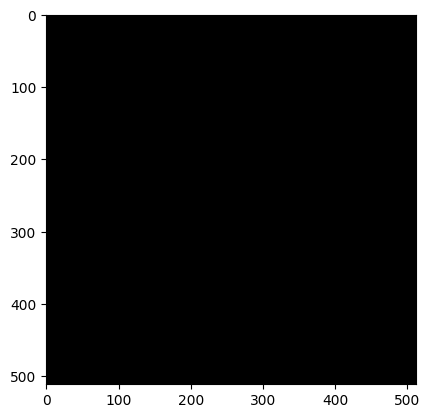

In [24]:
final_image = np.zeros((512, 512), dtype=np.uint8)

# Plot the blank image
plt.imshow(final_image,cmap='gray')  # Turn off axis
plt.show()


In [25]:
for i in range(512):
    for j in range(512):
        r_x,nr_x=dist_x(img_t[i,j,:])
        if prior_river*r_x >=prior_non_river*nr_x:
            final_image[i][j]='0'
        else:
            final_image[i][j]='1'
        


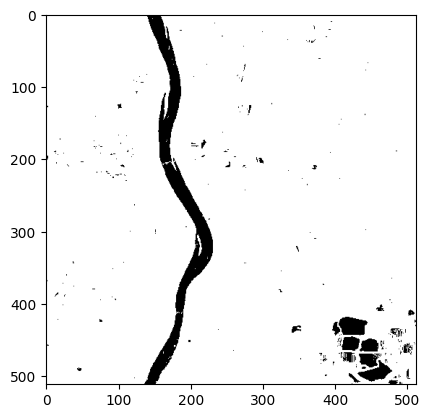

In [37]:
plt.imshow(final_image,cmap='gray')

### Saving Image

In [40]:
plt.imsave('final_image.jpg',final_image,cmap='gray')


In [28]:
label_river_intensity=final_image[river_coord[:,0],river_coord[:,1]]
label_non_river_intensity=final_image[non_river_coord[:,0],non_river_coord[:,1]]

label_output=np.concatenate((label_river_intensity.flatten(),label_non_river_intensity.flatten()))
#label_output
label_river_intensity.shape

(50,)

In [ ]:
label_river_intensity

In [30]:
label_input=np.concatenate((df1['label'],df2['label']))

### Confusion Matrix

In [31]:
def confusion_matrix_for_label(true_labels, predicted_labels, label):
    conf_matrix = np.zeros((2, 2), dtype=int)
    for true, pred in zip(true_labels, predicted_labels):
        if true == label and pred == label:
            conf_matrix[0, 0] += 1  # True positive
        elif true == label and pred != label:
            conf_matrix[0, 1] += 1  # False negative
        elif true != label and pred == label:
            conf_matrix[1, 0] += 1  # False positive
        else:
            conf_matrix[1, 1] += 1  # True negative
    
    return conf_matrix

In [43]:
conf_matrix_label_2 = confusion_matrix_for_label(label_input,label_output, 0)

#### Calculating Accuracy

In [44]:
conf_matrix_label_2

array([[ 50,   0],
       [  0, 150]])

In [47]:

df_confusion_matrix = pd.DataFrame(conf_matrix_label_2, columns=['Actual River', 'Actual Non-River'], index=['Predicted River', 'Predicted Non-River'])


In [48]:
print(df_confusion_matrix)

                     Actual River  Actual Non-River
Predicted River                50                 0
Predicted Non-River             0               150
